<a href="https://colab.research.google.com/github/Ridhtang54/python-for-finance/blob/main/Value_at_Risk_for_NVDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


Monte Carlo VaR (99% confidence): $-33.33


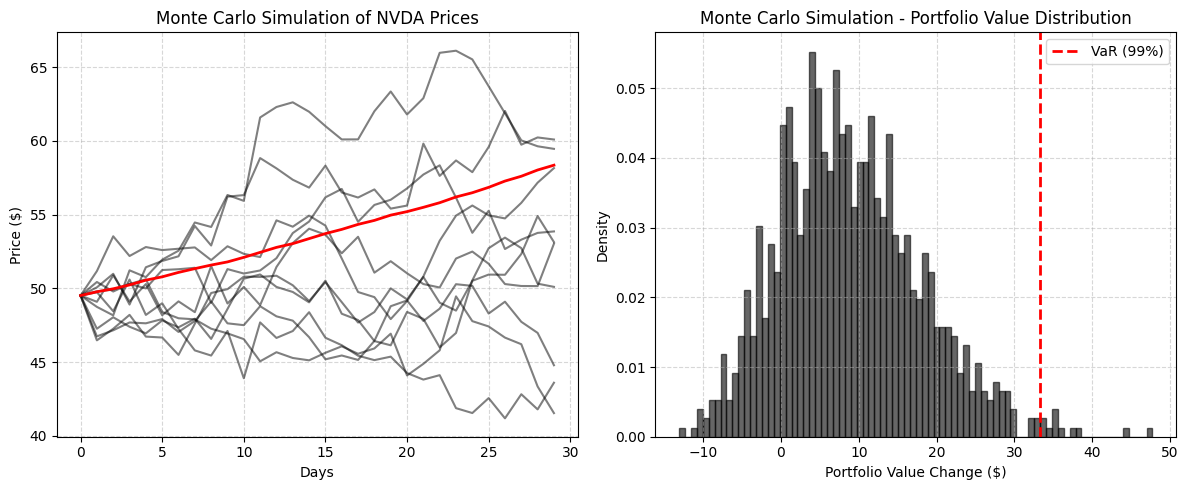

In [25]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Running number of simulations
num_simulations = 1000

# Now forecasting period in number of trading days
forecast_days = 30

# Confidence level
confidence_level = 0.99


# Ticker symbol
ticker = 'NVDA'

# Download historical data
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')['Adj Close']

# Calculate log returns
log_returns = np.log(data / data.shift(1))

# Initialize simulation prices array
simulation_prices = np.zeros((num_simulations, forecast_days))

# Set the initial price for each simulation
simulation_prices[:, 0] = data.iloc[-1]

# Run the simulation
for i in range(1, forecast_days):
    # Drift component (mean of historical log returns)
    drift = log_returns.mean()

    # Standard deviation of historical log returns
    st_dev = log_returns.std()

    # Generate random numbers for each simulation
    z = np.random.normal(0, 1, num_simulations)

    # Calculate the new price for each simulation
    simulation_prices[:, i] = simulation_prices[:, i-1] * np.exp(drift + st_dev * z)

# Calculate portfolio values
portfolio_values = simulation_prices[:, -1] - simulation_prices[:, 0]

# Sort the portfolio values
sorted_values = np.sort(portfolio_values)

# Calculate VaR
var_monte_carlo = -np.percentile(sorted_values, 100 * confidence_level)

# Calculate average prices
average_prices = np.mean(simulation_prices, axis=0)

# Print VaR result
print(f"Monte Carlo VaR ({confidence_level * 100:.0f}% confidence): ${var_monte_carlo:.2f}")

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for j in range(10):
    ax1.plot(simulation_prices[j, :], linestyle='-', alpha=0.5, color='black')

ax1.plot(average_prices, color='red', linestyle='-', linewidth=2, label='Average')
ax1.set_title(f'Monte Carlo Simulation of {ticker} Prices')
ax1.set_xlabel('Days')
ax1.set_ylabel('Price ($)')
ax1.grid(True, linestyle='--', alpha=0.5)

ax2.hist(portfolio_values, bins=80, density=True, alpha=0.6, color='black', edgecolor='black')
ax2.axvline(x=-var_monte_carlo, color='red', linestyle='--', linewidth=2, label=f'VaR ({confidence_level * 100:.0f}%)')
ax2.set_title(f'Monte Carlo Simulation - Portfolio Value Distribution')
ax2.set_xlabel('Portfolio Value Change ($)')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()